In [55]:
from approximations import *
from aspergillus_msb import *
import matplotlib.pyplot as plt
import pickle
import os
from scipy.stats import pearsonr
import scipy.stats as st

In [56]:
with open('MSB_NK_landscape_1.txt', 'rb') as f:
    landscape_1_results = pickle.load(f)
with open('MSB_NK_landscape_3.txt', 'rb') as f:
    landscape_3_results = pickle.load(f)
with open('MSB_NK_landscape_5.txt', 'rb') as f:
    landscape_5_results = pickle.load(f)
with open('NK_landscapes_6.txt', 'rb') as f:
    landscapes = pickle.load(f)

In [57]:
files_appearance_NK1 = ['results_appearance_NK1_param2_5.txt',
 'results_appearance_NK1_param2_8.txt', 
'results_appearance_NK1_param2_11.txt',
 'results_appearance_NK1_param2_14.txt',
 'results_appearance_NK1_param2_17.txt',
 'results_appearance_NK1_param2_20.txt',
 'results_appearance_NK1_param2_23.txt',
 'results_appearance_NK1_param2_26.txt',
 'results_appearance_NK1_param2_29.txt']

files_appearance_NK3 = ['results_appearance_NK3_param2_5.txt',
 'results_appearance_NK3_param2_8.txt', 
'results_appearance_NK3_param2_11.txt',
 'results_appearance_NK3_param2_14.txt',
 'results_appearance_NK3_param2_17.txt',
 'results_appearance_NK3_param2_20.txt',
 'results_appearance_NK3_param2_23.txt',
 'results_appearance_NK3_param2_26.txt',
 'results_appearance_NK3_param2_29.txt']

files_appearance_NK3 = ['results_appearance_NK3_param2_5.txt',
 'results_appearance_NK3_param2_8.txt', 
 'results_appearance_NK3_param2_11.txt',
 'results_appearance_NK3_param2_14.txt',
 'results_appearance_NK3_param2_17.txt',
 'results_appearance_NK3_param2_20.txt',
 'results_appearance_NK3_param2_23.txt',
 'results_appearance_NK3_param2_26.txt',
 'results_appearance_NK3_param2_29.txt']

files_appearance_NK5 = ['results_appearance_NK5_param2_5.txt',
 'results_appearance_NK5_param2_8.txt', 
'results_appearance_NK5_param2_11.txt',
 'results_appearance_NK5_param2_14.txt',
 'results_appearance_NK5_param2_17.txt',
 'results_appearance_NK5_param2_20.txt',
 'results_appearance_NK5_param2_23.txt',
 'results_appearance_NK5_param2_26.txt',
 'results_appearance_NK5_param2_29.txt']

In [58]:
appearances_NK1 = []
for f in files_appearance_NK1:
    with open('Old Results/' + f, 'rb') as f:
        appearances_NK1.append(pickle.load(f)['appearances'])
appearances_NK3 = []
for f in files_appearance_NK3:
    with open('Old Results/' + f, 'rb') as f:
        appearances_NK3.append(pickle.load(f)['appearances'])
appearances_NK5 = []
for f in files_appearance_NK5:
    with open('Old Results/' + f, 'rb') as f:
        appearances_NK5.append(pickle.load(f)['appearances'])

In [59]:
genotypes = [tuple(''.join([str(i) for i in x])) for x in landscapes[1].keys()]
all_genotypes = []
for i in range(2):
    for g in genotypes:
        all_genotypes.append((i, g))
initial_genotypes = [tuple('111100'), tuple('100111'), tuple('100101')] 
initial_genotype = initial_genotypes[0]
noise_levels = np.logspace(-6,np.log10(0.5),30)

In [26]:
print('Bridges for NK K = 1')

for g1 in landscapes[1].keys():
    if (hamming(tuple([str(x) for x in g1]), tuple(initial_genotypes[0])) == 2/6) and (landscapes[1][g1] > landscapes[1][tuple([int(x) for x in initial_genotype])]):
        print(g1, landscapes[1][g1])
        
print('Bridges for NK K = 3')        
for g1 in landscapes[3].keys():
    if (hamming(tuple([str(x) for x in g1]), tuple(initial_genotypes[1])) == 2/6) and (landscapes[3][g1] > landscapes[3][tuple([int(x) for x in initial_genotypes[1]])]):
        print(g1, landscapes[3][g1])
   
print('Bridges for NK K = 5') 
for g1 in landscapes[5].keys():
    if (hamming(tuple([str(x) for x in g1]), tuple(initial_genotypes[2])) == 2/6) and (landscapes[5][g1] > landscapes[5][tuple([int(x) for x in initial_genotypes[2]])]):
        print(g1, landscapes[5][g1])

Bridges for NK K = 1
(1, 1, 0, 1, 1, 0) 0.7465349225941939
(1, 1, 1, 1, 1, 1) 0.7260897884697983
Bridges for NK K = 3
(0, 0, 0, 0, 1, 1) 0.5871860883146441
(1, 0, 1, 1, 1, 0) 0.7611790349894924
Bridges for NK K = 5
(1, 1, 1, 1, 0, 1) 0.9560486040518809


In [27]:
bridges_NK1 = ['111101','111110','111110','110100']
bridges_NK3 = ['100011','000111','101111','100110']
bridges_NK5 = ['110101','101101']

### Appearance from numerical simulations

In [28]:
def probability_appearance_numerical(mu, tau, all_genotypes, bridges, pop):
    m1_indexes = [all_genotypes.index((0, tuple(b))) for b in bridges]
    M1_indexes = [all_genotypes.index((1, tuple(b))) for b in bridges]
    from_m1 = np.sum(np.array([pop[i]*mu*((1-mu)**5) for i in m1_indexes]))
    from_M1 =  np.sum(np.array([pop[i]*tau*mu*((1-tau*mu)**5) for i in M1_indexes]))
    
    return(from_m1+from_M1)

In [29]:
np.sum(landscape_1_results[2]['result'][29]['pop'][64:])

0.5000000000000001

In [30]:
noise_levels[15]

0.0008866313957970564

In [31]:
mu = landscape_1_results[2]['mu']
tau = landscape_1_results[2]['tau']
pop_size = 100000

In [32]:
tau

10

In [33]:
pearsonr(appearance_num_NK3, appearance_sim_NK3)[0]**2

0.9810987861188084

In [34]:
appearance_num_NK1 = [pop_size*probability_appearance_numerical(mu, tau, all_genotypes, bridges_NK1, landscape_1_results[2]['result'][i]['pop']) for i in range(30)]
appearance_sim_NK1 = [pop_size*calculate_rate_appearance_approximation(noise_levels[i], mu, tau, 0.07513436744009738, bridges_NK1) for i in range(30)]
appearance_num_NK3 = [pop_size*probability_appearance_numerical(mu, tau, all_genotypes, bridges_NK3, landscape_3_results[2]['result'][i]['pop']) for i in range(30)]
appearance_sim_NK3 = [pop_size*calculate_rate_appearance_approximation(noise_levels[i], mu, tau, 0.044263562977290435, bridges_NK3) for i in range(30)]
appearance_num_NK5 = [2*1000000*probability_appearance_numerical(mu, tau, all_genotypes, bridges_NK5, landscape_5_results[2]['result'][i]['pop']) for i in range(30)]
appearance_sim_NK5 = [2*1000000*calculate_rate_appearance_approximation(noise_levels[i], mu, tau, 0.5955574364770879, bridges_NK5) for i in range(30)]

In [35]:
def mle(X):
    p_hat = 1/X.mean()
    p_hat = p_hat - p_hat * (1 - p_hat) / X.size
    return p_hat

def loglik(p, X):
    return st.geom(p).logpmf(X).mean()

def draw(p, X):
    x = np.zeros(500)
    x[:475] = X.copy()
    ## because the geom dist is memoryless
    x[475:] = X.max() + np.random.geometric(p, size=25)
    return x

def estimation_p(X):
    x = 0
    n = 5000
    loguniforms = np.log(np.random.random(size=n))
    p_hats = np.zeros(n)
    logliks = np.zeros(n)
    accept = 0
    t = 0
    p_hats[t] = mle(X)
    logliks[t] = loglik(p_hats[t], x)    
    
    for t in range(1, n):
        x = draw(p_hats[t-1], X)
        p_hats[t] = mle(x)
        logliks[t] = loglik(p_hats[t], x)
        logα = logliks[t] - logliks[t-1] # log(lik / lik)
        # accept / reject
        if logα > loguniforms[t]: # accept (uniform is lower than α with probability α )
            accept += 1
        else: # reject
            p_hats[t] = p_hats[t-1]
            logliks[t] = logliks[t-1]
            
    print('acceptance rate:', accept/n)  
    
    return(np.quantile(p_hats[n//2:],0.05), np.quantile(p_hats[n//2:],0.95), np.mean(p_hats[n//2:]))

def estimate_mean(X):
    p_hat = 1/X.mean()
    p_hat = p_hat - p_hat * (1 - p_hat) / X.size
    return(p_hat)

def construct_total_errorbars(estimates, raw_errorbars):
    
    raw_errors = np.array(raw_errorbars).T
    raw_errors[0] = np.abs(raw_errors[0]-np.array(estimates))
    raw_errors[1] = np.abs(raw_errors[1]-np.array(estimates))
    
    return(raw_errors)

In [48]:
appearances_NK1[-3].remove(0)

In [49]:
error_bars_and_mean_NK5 =  [estimation_p(np.array(result)[:475]) for result in appearances_NK5]
error_bars_and_mean_NK3 =  [estimation_p(np.array(result)[:475]) for result in appearances_NK3]
error_bars_and_mean_NK1 =  [estimation_p(np.array(result)[:475]) for result in appearances_NK1]

acceptance rate: 0.9938
acceptance rate: 0.9946
acceptance rate: 0.9944
acceptance rate: 0.9944
acceptance rate: 0.9946
acceptance rate: 0.9934
acceptance rate: 0.9952
acceptance rate: 0.9938
acceptance rate: 0.9948
acceptance rate: 0.9964
acceptance rate: 0.995
acceptance rate: 0.991
acceptance rate: 0.9944
acceptance rate: 0.994
acceptance rate: 0.9944
acceptance rate: 0.9946
acceptance rate: 0.9946
acceptance rate: 0.9938
acceptance rate: 0.9934
acceptance rate: 0.9928
acceptance rate: 0.9952
acceptance rate: 0.9964
acceptance rate: 0.9926
acceptance rate: 0.996
acceptance rate: 0.9956
acceptance rate: 0.9942
acceptance rate: 0.9942


In [50]:
error_bars_NK5 = [x[:2] for x in error_bars_and_mean_NK5]
all_estimated_v_NK5 = [result[2] for result in error_bars_and_mean_NK5]

error_bars_NK3 = [x[:2] for x in error_bars_and_mean_NK3]
all_estimated_v_NK3 = [result[2] for result in error_bars_and_mean_NK3]

error_bars_NK1 = [x[:2] for x in error_bars_and_mean_NK1]
all_estimated_v_NK1 = [result[2] for result in error_bars_and_mean_NK1]

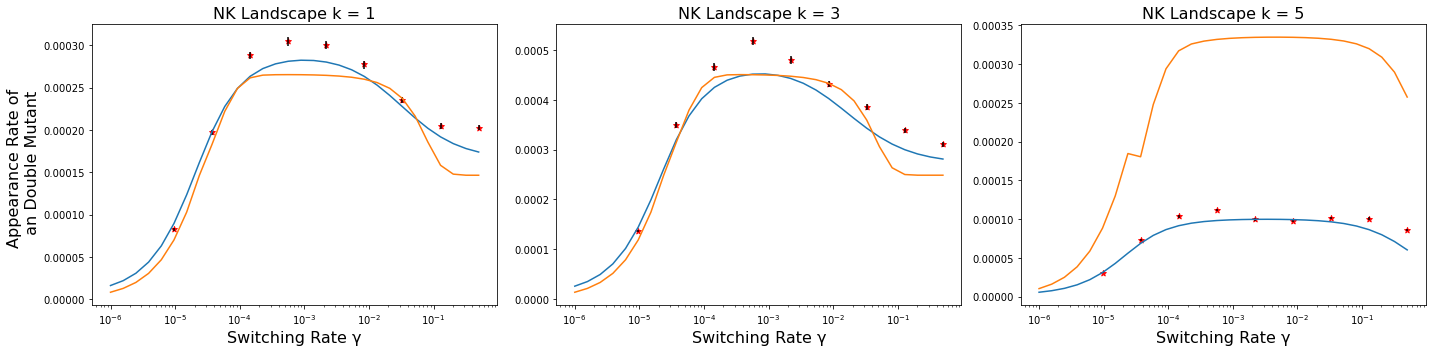

In [54]:
fig, ax = plt.subplots(1,3, figsize = (20,5))
short_noise_levels = [noise_levels[x] for x in np.arange(5,30,3)]
ax[2].plot(noise_levels, appearance_num_NK5)
ax[2].plot(noise_levels, appearance_sim_NK5)
ax[2].scatter(short_noise_levels, all_estimated_v_NK5, marker = '*', c='red')
ax[2].errorbar(short_noise_levels, all_estimated_v_NK5, construct_total_errorbars(all_estimated_v_NK5, error_bars_NK5), linestyle = '', c = 'k')
ax[2].set_xscale('log')
ax[2].set_title('NK Landscape k = 5', fontsize = 16)
ax[2].set_xlabel('Switching Rate γ', fontsize = 16)


short_noise_levels = [noise_levels[x] for x in np.arange(5,30,3)]
ax[1].plot(noise_levels, appearance_num_NK3)
ax[1].plot(noise_levels, appearance_sim_NK3)
ax[1].scatter(short_noise_levels, all_estimated_v_NK3, marker = '*', c='red')
ax[1].errorbar(short_noise_levels, all_estimated_v_NK3, construct_total_errorbars(all_estimated_v_NK3, error_bars_NK3), linestyle = '', c = 'k')
ax[1].set_xscale('log')
ax[1].set_title('NK Landscape k = 3', fontsize = 16)
ax[1].set_xlabel('Switching Rate γ', fontsize = 16)

short_noise_levels = [noise_levels[x] for x in np.arange(5,30,3)]
ax[0].plot(noise_levels, appearance_num_NK1)
ax[0].plot(noise_levels, appearance_sim_NK1)
ax[0].scatter(short_noise_levels, all_estimated_v_NK1, marker = '*', c='red')
ax[0].errorbar(short_noise_levels, all_estimated_v_NK1, construct_total_errorbars(all_estimated_v_NK1, error_bars_NK1), linestyle = '', c = 'k')
ax[0].set_xscale('log')
ax[0].set_title('NK Landscape k = 1', fontsize = 16)
ax[0].set_xlabel('Switching Rate γ', fontsize = 16)
ax[0].set_ylabel('Appearance Rate of \n an Double Mutant', fontsize = 16)

plt.tight_layout()
plt.savefig('NK_crossing_valley_MAY11.jpg', dpi = 400)

In [61]:
pearsonr(appearance_num_NK5, appearance_sim_NK5)[0]

0.9857169213597269

In [62]:
pearsonr(appearance_num_NK1, appearance_sim_NK1)[0]

0.9925714186608084

In [63]:
pearsonr(appearance_num_NK3, appearance_sim_NK3)[0]

0.9905043089854827

In [64]:
appearance_sim_NK5 = [1000000*calculate_rate_appearance_approximation(noise_levels[i], mu, tau, 0.5955574364770879, bridges_NK5) for i in range(30)]

In [16]:
def calculate_rate_appearance_approximation(noise, mu, tau, s, bridges):
    B = len(bridges)
    
    M1 = calculate_M1(noise, mu*6,tau,s)
    m1 = calculate_m1(noise, mu*6,tau,s)
    
    from_M1 = (B/6)*tau*mu*((1-tau*mu)**5)*M1
    from_m1 = (B/6)*mu*((1-mu)**5)*m1
    
    #return(from_M1+from_m1)
    return(from_M1)